# Ensemble Technique

Technique which combines several base models (Tree) in order to produce optimal predictve model

# Two Methods

In [ ]:
1. Bagging > Follows ( Parallel Approach)
  Bagging >> Bootstraping + Aggregating
    1. Random Forest


2. Boosting > Follows ( Sequentianl Approach)
   a) Adaboost
   b) Gradient Boost
   c) XGBoost
   d) CatBoost

# Random Forest
Forest of Trees

# RANDOM FOREST WITH CLASSIFIER PROBLEM

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [11]:
# pip install --user imblearn

In [12]:
# imbalancing of data is available in only in Classification problem

In [2]:
df =pd.read_csv("D:/PYTHON_NOTES/CSV/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Outcome', ylabel='count'>

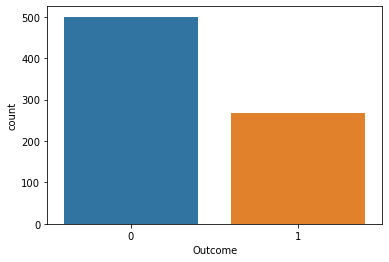

In [5]:
sns.countplot(x=df["Outcome"])

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Train_test_Split

In [7]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']

In [8]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)


# Model Training with Random forset

In [9]:
Random_Forset = RandomForestClassifier()
Random_Forset.fit(x_train,y_train)

RandomForestClassifier()

# Training

In [10]:
# Training
y_pred_train =Random_Forset.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[400   0]
 [  0 214]]
accuracy_score
 1.0
classification_report_
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# Testing

In [11]:
# Testing
y_pred_test =Random_Forset.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[87 13]
 [21 33]]
accuracy_score
 0.7792207792207793
classification_report_
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



# Model Training With Decision Tree

In [12]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
# Training
y_pred_train =Decision_Tree.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[400   0]
 [  0 214]]
accuracy_score
 1.0
classification_report_
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [14]:
# Testing
y_pred_test =Decision_Tree.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[79 21]
 [29 25]]
accuracy_score
 0.6753246753246753
classification_report_
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



# Hyperparameter Tunnig

In [47]:
import warnings
warnings.filterwarnings("ignore")
RF_Model =RandomForestClassifier()
hyperparameter ={"n_estimators":np.arange(10,20),
                 'criterion':['gini','Entropy'], 
                 'max_depth':np.arange(4,10),
                 'min_samples_split':np.arange(3,10),
                 'min_samples_leaf':np.arange(3,10),
                 "max_features":['sqrt','log2'],
                 'random_state':[41,42,43,44,45],
                 "oob_score":[True]}
rdscv=RandomizedSearchCV(RF_Model,hyperparameter,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'Entropy'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

>n_estimators: This specifies the number of decision trees in the random forest.
criterion: This specifies the criterion used to split nodes in the decision trees. The options are 'gini' for the Gini impurity and 'entropy' for the information gain.

>max_depth: This specifies the maximum depth of the decision trees in the random forest. A larger maximum depth can lead to more complex trees, which may improve performance but can also increase the risk of overfitting.

>min_samples_split: This specifies the minimum number of samples required to split a node in the decision trees.

>min_samples_leaf: This specifies the minimum number of samples required to be at a leaf node in the decision trees.

>max_features: This specifies the maximum number of features to consider when looking for the best split at each node in the decision trees. The options are 'sqrt', which uses the square root of the number of features, and 'log2', which uses the logarithm of the number of features.

>random_state: This specifies the random seed used by the random forest classifier. Setting the random seed can help ensure that the results of the model are reproducible.

>oob_score: This specifies whether to use out-of-bag samples to estimate the generalization accuracy of the model. Out-of-bag samples are samples that are not used for training and can be used to estimate the performance of the model on new data.




Regenerate response

unseen data. This can be useful as an alternative to using a separate validation set to estimate the generalization error, because it allows the model to use all of the data for training, rather than reserving a portion of the data for validation.

In [53]:
rdscv.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)

In [55]:
RF_Model =RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)
RF_Model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)

In [57]:
# Training
y_pred_train =RF_Model.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[364  36]
 [ 59 155]]
accuracy_score
 0.8452768729641694
classification_report_
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       400
           1       0.81      0.72      0.77       214

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.84      0.85      0.84       614



In [56]:
# Testing
y_pred_test =RF_Model.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[89 11]
 [24 30]]
accuracy_score
 0.7727272727272727
classification_report_
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



# Feature Selection 

In [58]:
array =RF_Model.feature_importances_
array
# every feture are important mean every feature are particpating for making prediction

array([0.04818209, 0.3452842 , 0.04796578, 0.05077284, 0.0478164 ,
       0.19111659, 0.08914948, 0.17971261])

<AxesSubplot:>

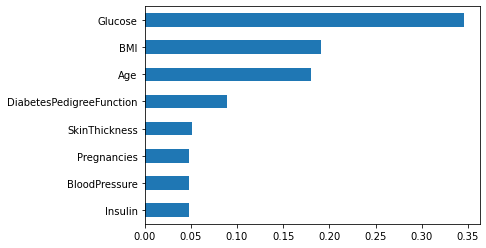

In [59]:
array = RF_Model.feature_importances_
Data =pd.Series(array,index=x.columns)
Data.sort_values().plot(kind="barh")

In [61]:
RF_Model.oob_score_

0.7361563517915309

In [62]:
RF_Model.oob_score

True

# Sampling technics

In [63]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [64]:
y_train.value_counts()

0    400
1    400
Name: Outcome, dtype: int64

# RANDOM FOREST WITH REGRESSOR PROBLEM

In [24]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import load_boston

In [26]:
boston=load_boston()

In [27]:
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target)

# train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)


# model Training

In [29]:
decision_tree =DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

# Model Evalution 

In [30]:
y_pred_train = decision_tree.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

0.0
0.0
1.0


In [31]:
y_pred_test = decision_tree.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)

2.7490196078431377
15.274313725490197
0.858673205606419


# Randomforest

In [32]:
Ran_forest = RandomForestRegressor()
Ran_forest.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_pred_train = Ran_forest.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

0.8137499999999992
1.4150471905940598
0.9819371136787222


In [34]:
y_pred_test = Ran_forest.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)


2.3867254901960777
9.865488509803914
0.9087187882038512


# Hyperparameter Tuning with RandomForestRegressor()

In [35]:
import warnings
warnings.filterwarnings("ignore")
rf_reg_hype = RandomForestRegressor()
hyper = {"n_estimators":np.arange(10,20),
         'criterion':['mse','mae'],
         'max_depth':np.arange(4,10),
         'min_samples_split':np.arange(3,10),
         'min_samples_leaf': np.arange(3,10),
         'max_features':['sqrt','log2'],
         'random_state':[41,42,43,44,45],
         'oob_score':[True]}
rdscv =RandomizedSearchCV(rf_reg_hype,hyper,cv=5)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

In [36]:
rdscv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=7, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=7, n_estimators=14,
                      oob_score=True, random_state=44)

In [37]:
updated=RandomForestRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=5, n_estimators=11,
                      oob_score=True, random_state=45)
updated.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=5, n_estimators=11,
                      oob_score=True, random_state=45)

In [19]:
y_pred_train = updated.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

1.9542979297929792
9.03986058833156
0.8846074001965383


In [20]:
y_pred_test = updated.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)


3.01319073083779
18.242223707664884
0.8312123840357923


In [40]:
# plt.figure(figsize=(400,250))
# plot_tree(updated,feature_names=x.columns,filled=True)
# plt.savefig("Random Forest Decision Tree with regressor.png")

# hyperparameter Tunning with Decision Tree

In [42]:
import warnings
warnings.filterwarnings("ignore")
dec_trr_hype =DecisionTreeRegressor()
hyper = {'criterion':['mse','mae'],
         'max_depth':np.arange(4,10),
         'min_samples_split':np.arange(3,10),
         'min_samples_leaf': np.arange(3,10),
         'random_state':[41,42,43,44,45]
        }
rdscv =RandomizedSearchCV(dec_trr_hype,hyper,cv=5)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [41, 42, 43, 44, 45]})

In [43]:
rdscv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=5,
                      min_samples_split=4, random_state=41)

In [ ]:
Further To do check accuracy and you can use prunning (only in decision Tree)